In [81]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [82]:
#loading the dataset given
df1=pd.read_csv('data_1.csv')
df3=pd.read_csv('data_3.csv')
df4=pd.read_csv('data_4.csv')
df2 = pd.read_csv("data_2.txt")
# df3=pd.read_('data_3.txt')

In [85]:
#since we can remove the JV Date from the first data
df1.drop(columns=['JV Date'],inplace=True)

In [86]:
df1.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,306


In [87]:
df2.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7


In [88]:
column_names=['Service Area','Account Description',
  'Creditor',
  'Transaction Date',
  'JV Reference',
  'JV Value' ]

In [89]:
for i,col in enumerate([df1,df2,df3]):
    col.set_axis(column_names,axis=1,inplace=True)

In [90]:
data=['df1','df2','df3']
colm={}

for i,col in enumerate([df1,df2,df3]):
    colm[data[i]]=set(col.columns)

In [91]:
set.intersection(*colm.values())#all the columns are common here

{'Account Description',
 'Creditor',
 'JV Reference',
 'JV Value',
 'Service Area',
 'Transaction Date'}

In [92]:
df1.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,306


In [93]:
df2.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Value
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7


In [94]:
df=pd.concat([df1,df2,df3],ignore_index=True)

In [95]:
df.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93.0,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111.0,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6.0,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7.0,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381.0,306


In [96]:
df.shape[0]==sum([df1.shape[0],df2.shape[0],df3.shape[0]])

True

In [97]:
#getting the details of the combined data set

def get_data_info(data):
    print("shape of the dataframe: ",data.shape,"\n","="*50)
    print("size of the data: ",data.size,"\n","="*50)
    print("duplicate values present: ",data.duplicated().sum(),"\n","="*50)
    print("missing values %: \n",data.isnull().mean()*100,"\n","="*50)
    print("unique values present in the data: \n",data.nunique(),"\n","="*50)
    

In [98]:
get_data_info(df)

shape of the dataframe:  (12589, 6) 
size of the data:  75534 
duplicate values present:  0 
missing values %: 
 Service Area           0.007943
Account Description    0.015887
Creditor               0.015887
Transaction Date       0.015887
JV Reference           0.015887
JV Value               0.000000
dtype: float64 
unique values present in the data: 
 Service Area              25
Account Description       67
Creditor                1936
Transaction Date         739
JV Reference           10742
JV Value                6292
dtype: int64 


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589 entries, 0 to 12588
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         12588 non-null  object 
 1   Account Description  12587 non-null  object 
 2   Creditor             12587 non-null  object 
 3   Transaction Date     12587 non-null  object 
 4   JV Reference         12587 non-null  float64
 5   JV Value             12589 non-null  object 
dtypes: float64(1), object(5)
memory usage: 590.2+ KB


In [100]:
#the values of jv value is in object/string type

df['JV Value']=df['JV Value'].apply(lambda x:(''.join(re.findall(r"\d+",x)) ))
df['JV Value']=df['JV Value'].astype(float)

In [101]:
df['JV Value'].dtype #mission success

dtype('float64')

In [102]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])
df['date']=df['Transaction Date'].dt.day


In [103]:
df['month']=df['Transaction Date'].dt.month

In [104]:
df['year']=df['Transaction Date'].dt.year
df['QT']=df['Transaction Date'].dt.quarter
df['QT_validation']=df['Transaction Date'].dt.to_period('Q')

df['final_qr'] = pd.PeriodIndex(df['Transaction Date'], freq='Q')

In [105]:
df['Quarter'] = df['QT'].map(lambda x: "Q{}".format(x)).str[:-2]

In [106]:
df.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Value,date,month,year,QT,QT_validation,final_qr,Quarter
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93.0,14381.0,23.0,4.0,2014.0,2.0,2014Q2,2014Q2,Q2
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-03-04,111.0,600000.0,4.0,3.0,2014.0,1.0,2014Q1,2014Q1,Q1
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-02-04,6.0,30938.0,4.0,2.0,2014.0,1.0,2014Q1,2014Q1,Q1
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-02-04,7.0,21876.0,4.0,2.0,2014.0,1.0,2014Q1,2014Q1,Q1
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,2014-04-15,381.0,306.0,15.0,4.0,2014.0,2.0,2014Q2,2014Q2,Q2


In [107]:
df.Quarter.value_counts()

Q1    3272
Q3    3216
Q4    3168
Q2    2931
Qn       2
Name: Quarter, dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589 entries, 0 to 12588
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         12588 non-null  object        
 1   Account Description  12587 non-null  object        
 2   Creditor             12587 non-null  object        
 3   Transaction Date     12587 non-null  datetime64[ns]
 4   JV Reference         12587 non-null  float64       
 5   JV Value             12589 non-null  float64       
 6   date                 12587 non-null  float64       
 7   month                12587 non-null  float64       
 8   year                 12587 non-null  float64       
 9   QT                   12587 non-null  float64       
 10  QT_validation        12587 non-null  period[Q-DEC] 
 11  final_qr             12587 non-null  period[Q-DEC] 
 12  Quarter              12589 non-null  object        
dtypes: datetime64[ns](1), float64(6

In [111]:
df['QT_validation'].value_counts()

2016Q3    1098
2016Q1    1091
2015Q3    1087
2016Q4    1072
2014Q4    1057
2016Q2    1006
2015Q4     974
2014Q2     933
2014Q3     923
2017Q1     919
2015Q1     917
2015Q2     898
2014Q1     345
2017Q3     108
2017Q2      94
2017Q4      65
Freq: Q-DEC, Name: QT_validation, dtype: int64

In [114]:
#1st question starts here

In [117]:
#need to group data for total,avg,most common value of the transaction by service area, then accounts (year,quater)

In [118]:
def summary_table(data,group,value):
    """
    arg: data--> dataframe given
    arg: group--> list of columns to be group by
    arg: value--> column where stats are need to be calcualted 
    
    func: grouping the df by the columns mentioned
    
    return: dataframe confined by the parameters passed by
    """
    output=df.groupby(group)[value].agg(['count', 'mean', 'median','sum']).reset_index()
    print("created a dataframe with columns grouped by: {}\n values are aggregated by: {}".format(group,value))
    
    return output

In [119]:
sa_year_qrt=summary_table(df,list(('Service Area', 'year', 'Quarter')),'JV Value')
sa_year=summary_table(df,list(('Service Area', 'year')),'JV Value')

created a dataframe with columns grouped by: ['Service Area', 'year', 'Quarter']
 values are aggregated by: JV Value
created a dataframe with columns grouped by: ['Service Area', 'year']
 values are aggregated by: JV Value


## Question 1 part 2
### summary table -I

In [123]:
#displaying the created dataframe through groupby function for the second part of the question
sa_year_qrt

,Service Area,year,Quarter,count,mean,median,sum
0,Adults and Communities,2014.0,Q1,2,225.500000,225.5,451.0
1,Adults and Communities,2014.0,Q2,15,4793.400000,207.0,71901.0
2,Adults and Communities,2014.0,Q3,11,228.545455,124.0,2514.0
3,Adults and Communities,2014.0,Q4,14,3502.000000,198.0,49028.0
4,Adults and Communities,2015.0,Q1,7,1044.285714,268.0,7310.0
5,Adults and Communities,2015.0,Q2,10,14753.000000,205.0,147530.0
6,Adults and Communities,2015.0,Q3,19,3990.526316,164.0,75820.0
7,Adults and Communities,2015.0,Q4,17,1470.000000,1667.0,24990.0
8,Adults and Communities,2016.0,Q1,23,8437.130435,3247.0,194054.0
9,Adults and Communities,2016.0,Q2,38,19754.342105,2673.5,750665.0


## Question 1 part 2
### summary table -I

In [124]:
ad_year_qt

,Account Description,year,Quarter,count,mean,median,sum
0,Advertising,2014.0,Q2,8,4604.000000,5216.0,36832.0
1,Advertising,2014.0,Q3,3,5825.000000,5825.0,17475.0
2,Advertising,2014.0,Q4,5,4659.400000,5825.0,23297.0
3,Advertising,2015.0,Q1,2,5825.000000,5825.0,11650.0
4,Advertising,2015.0,Q2,2,2927.000000,2927.0,5854.0
5,Advertising,2015.0,Q4,2,115110.000000,115110.0,230220.0
6,Advertising,2016.0,Q4,4,47692.500000,60000.0,190770.0
7,Advertising for staff,2016.0,Q2,1,45000.000000,45000.0,45000.0
8,Books-CDs-Audio-Video,2014.0,Q1,25,1547.360000,411.0,38684.0
9,Books-CDs-Audio-Video,2014.0,Q2,50,5371.680000,1513.5,268584.0


In [125]:
#experimenting with the tables to create subset of the dataframe for plotting

In [126]:
sa_year_qrt[sa_year_qrt['Service Area']=="Adults and Communities"][['year','Quarter','count']]


,year,Quarter,count
0,2014.0,Q1,2
1,2014.0,Q2,15
2,2014.0,Q3,11
3,2014.0,Q4,14
4,2015.0,Q1,7
5,2015.0,Q2,10
6,2015.0,Q3,19
7,2015.0,Q4,17
8,2016.0,Q1,23
9,2016.0,Q2,38


In [127]:
sa_year_qrt[sa_year_qrt['Service Area']=="Adults and Communities"][['year','Quarter','sum']]


,year,Quarter,sum
0,2014.0,Q1,451.0
1,2014.0,Q2,71901.0
2,2014.0,Q3,2514.0
3,2014.0,Q4,49028.0
4,2015.0,Q1,7310.0
5,2015.0,Q2,147530.0
6,2015.0,Q3,75820.0
7,2015.0,Q4,24990.0
8,2016.0,Q1,194054.0
9,2016.0,Q2,750665.0


In [128]:
def plot_q1(data,col,val):
    """
    arg: data --> dataframe passed to get the plot
    arg: col --> column for which individual plots are need to be created 
    arg: val --> what kind of observation needed (mean,sum,count)
    fun: plot bar chart
    return None
    """
    count=0
    col_unique_values=data[col].unique()
    for i in col_unique_values:
        plot_df=data[data[col]==i][['year','Quarter',val]]
        count+=1
        plt.figure(figsize=(14,6))
        sns.barplot(data=plot_df,x='year',y=val,hue='Quarter')
        plt.title("{} of Transcation for {}".format(val,col))
        plt.xlabel("YEAR with unstacked Quarters")
        plt.ylabel(val)
        plt.tight_layout()
        plt.show()

In [129]:
def plot_q1a(data,col,val):
    """
    arg: data --> dataframe passed to get the plot
    arg: col --> column for summary creation
    arg: val --> column to apply sum
    fun: plot summary bar chart
    return None
    """
    summary_df = data.groupby([col, 'year', 'Quarter'])[val].sum().reset_index()
    plt.figure(figsize=(12, 8))
    a=sns.barplot(data=summary_df, x='Quarter', y=val, hue='year',errorbar=None)
    plt.title('Summary Plot: {}'.format(col))
    plt.xlabel('Quarters')
    plt.ylabel("summation of {}".format(val))
    a.yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))
    plt.tight_layout()
    plt.show()


## Question 1 part 1
### Vizualization of transaction stats for each service area

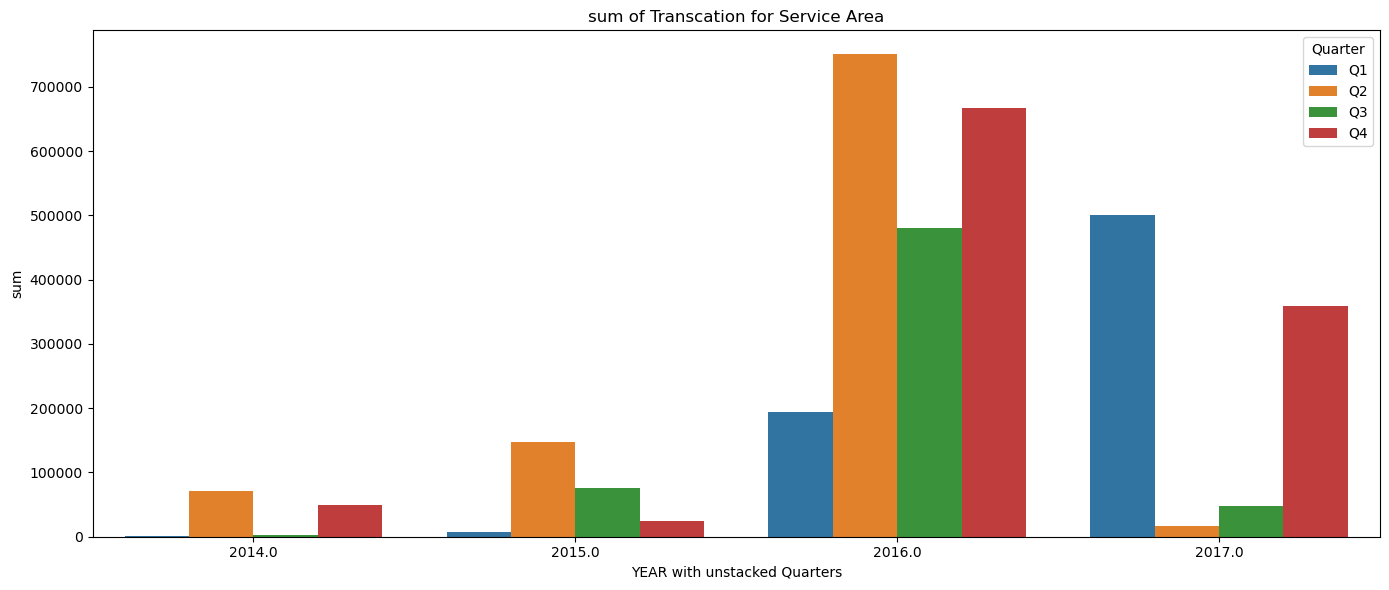

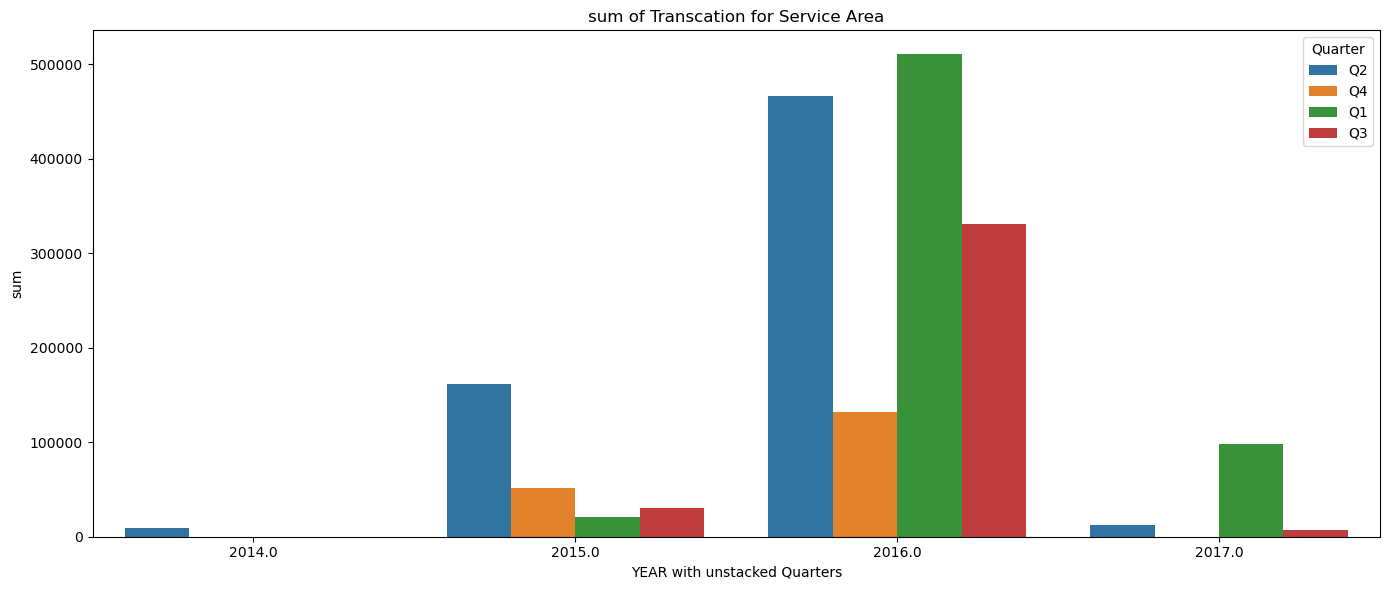

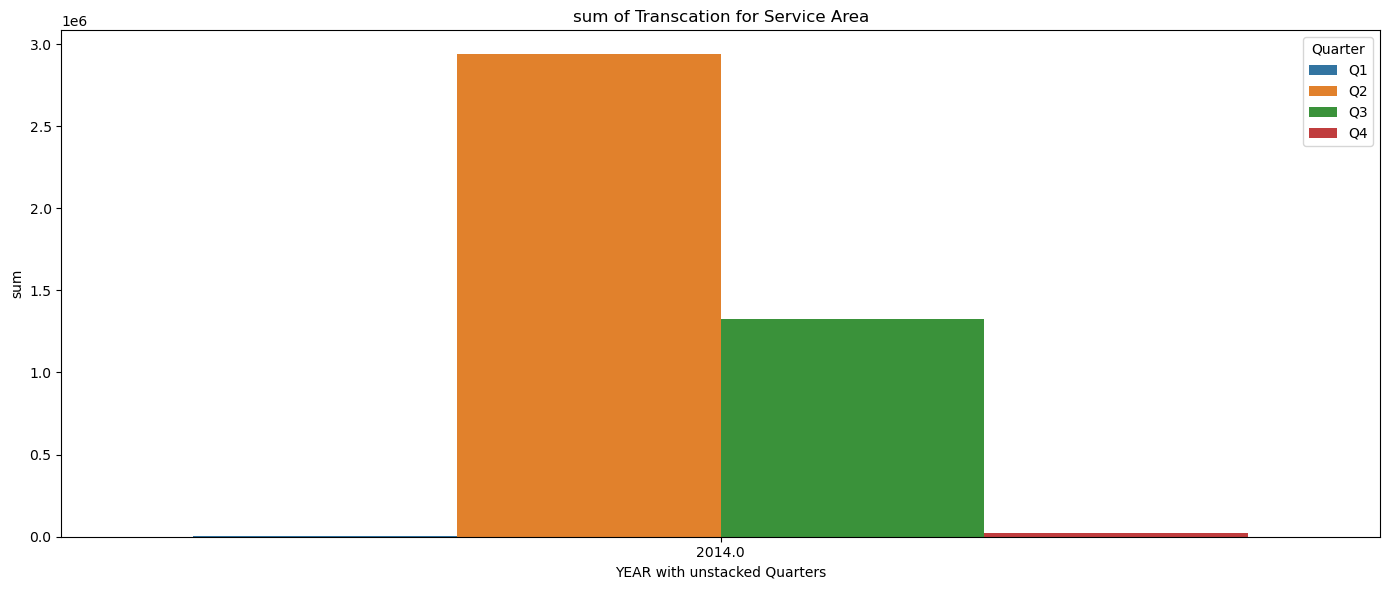

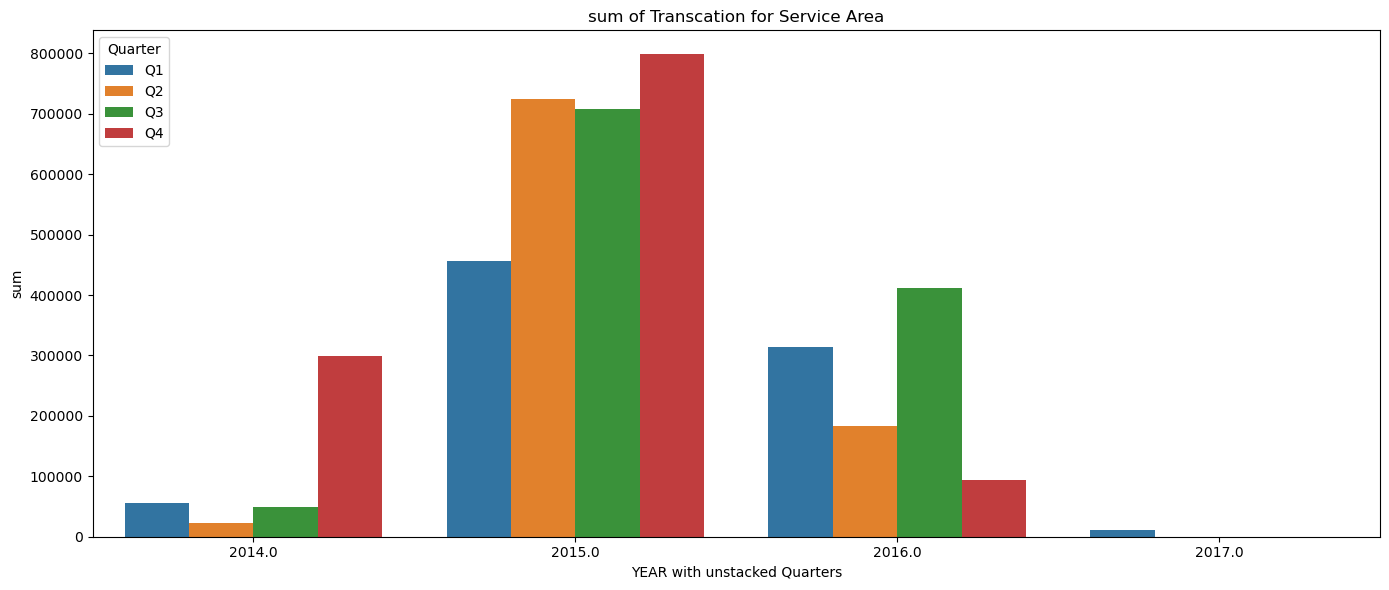

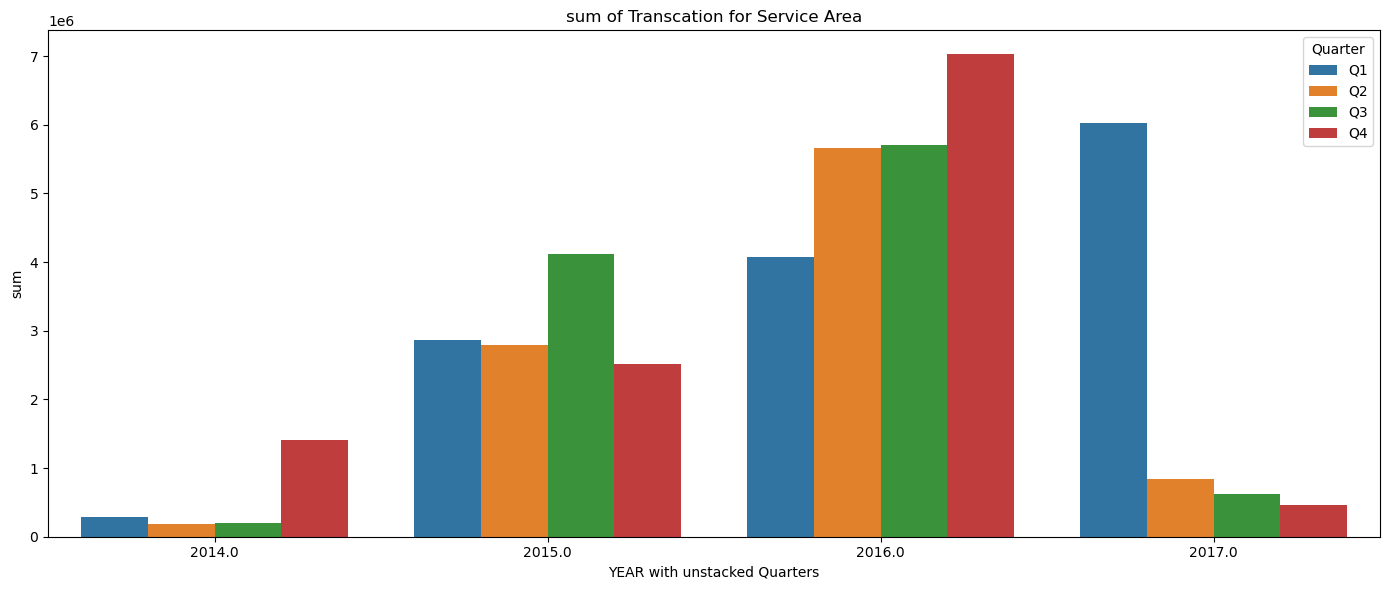

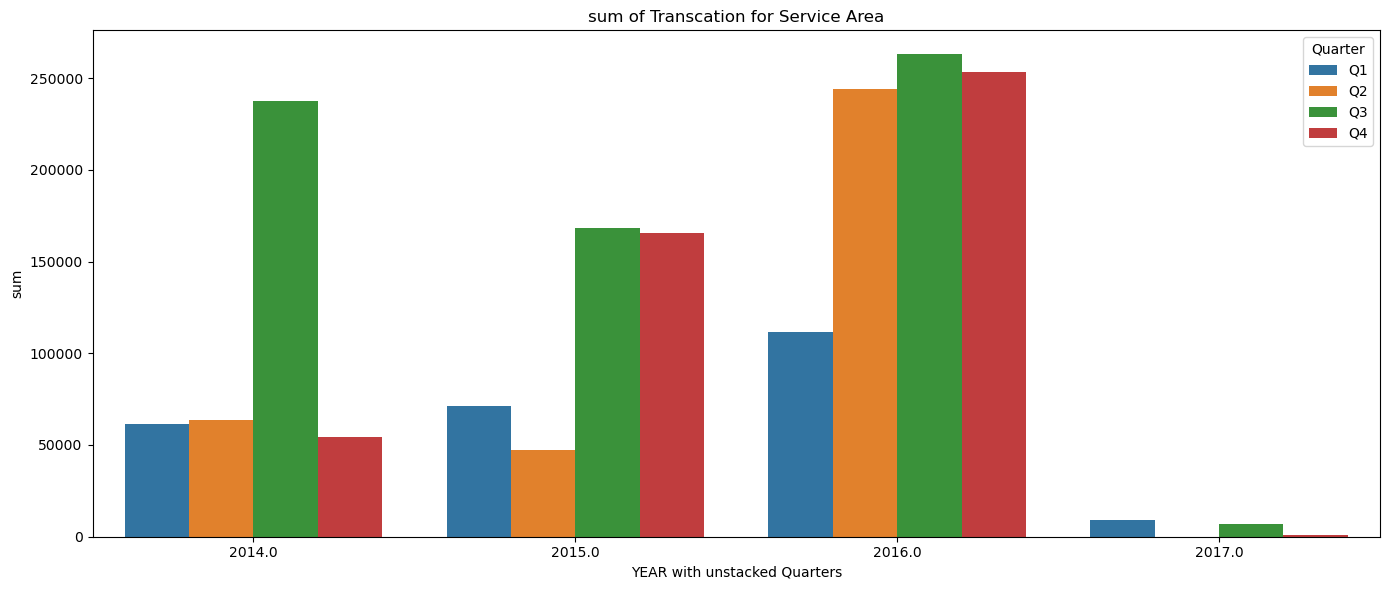

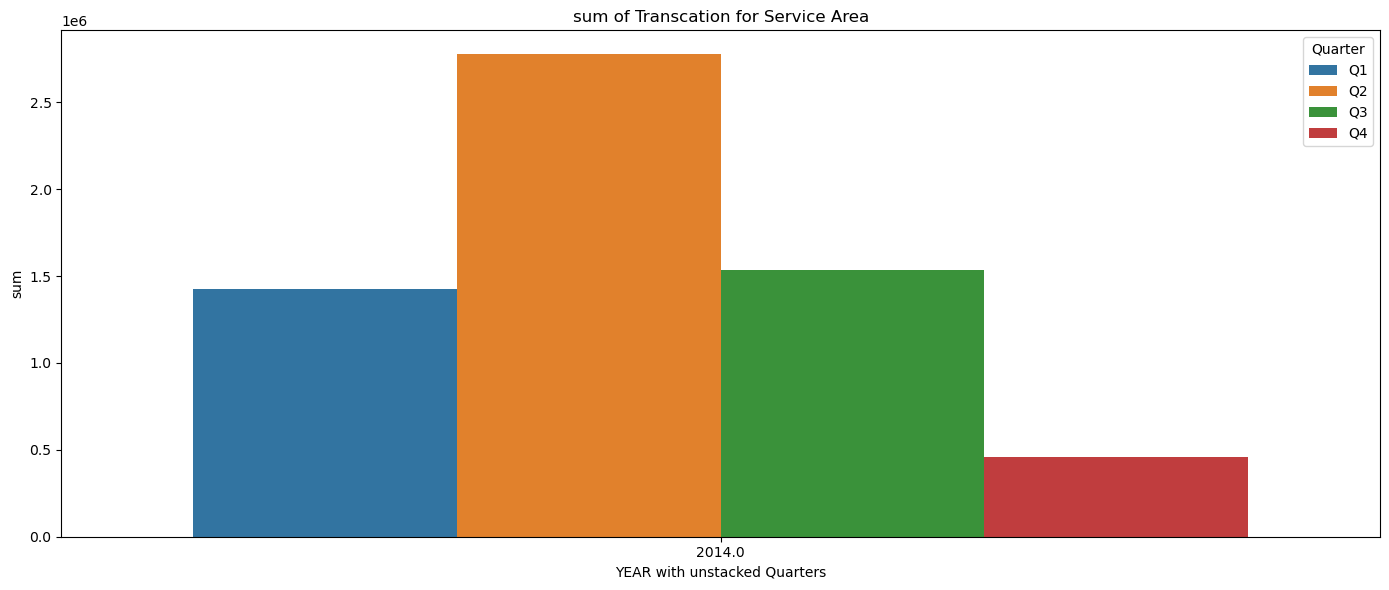

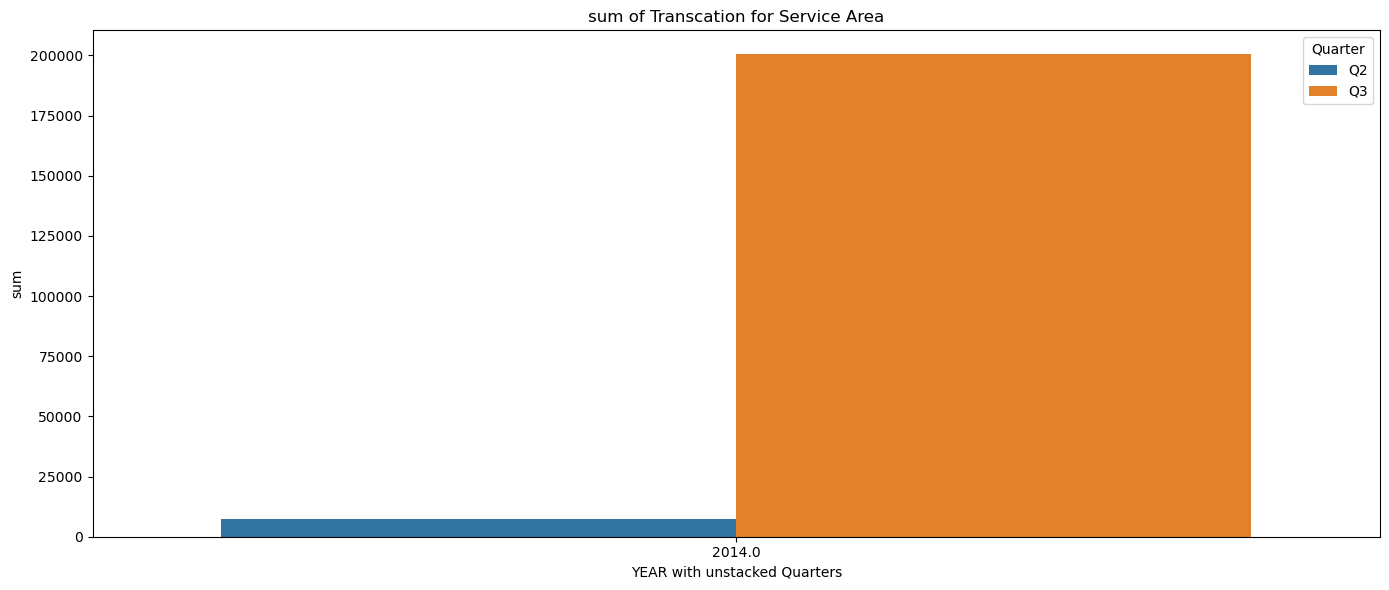

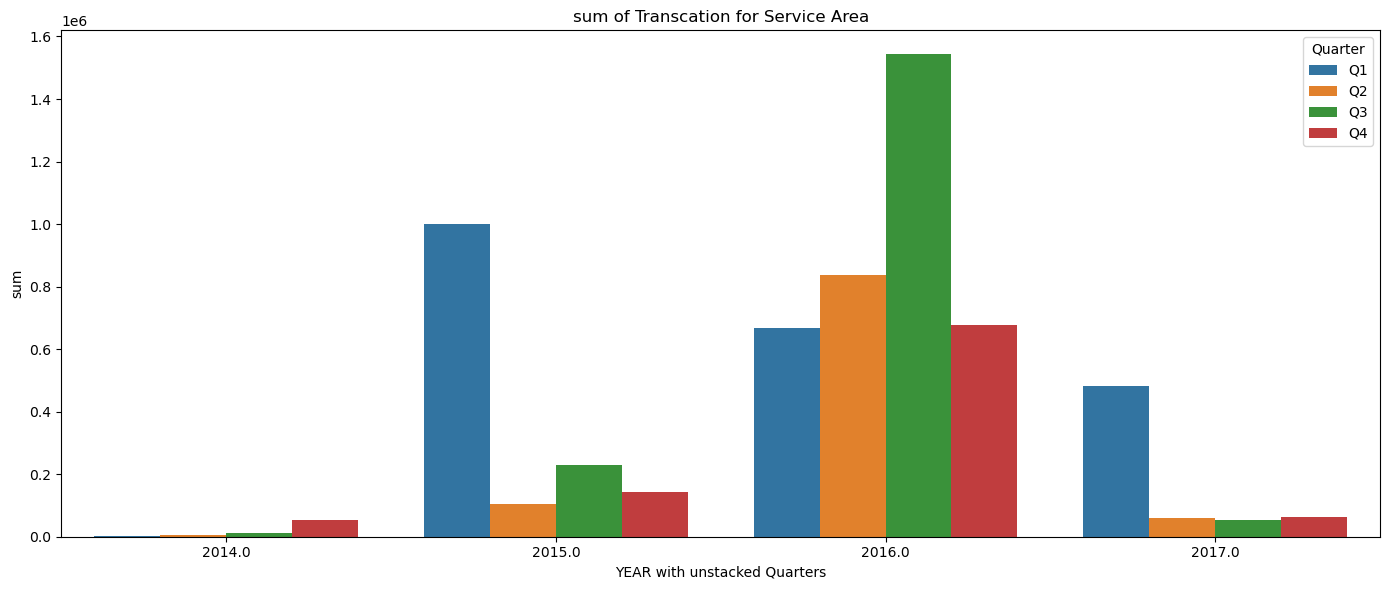

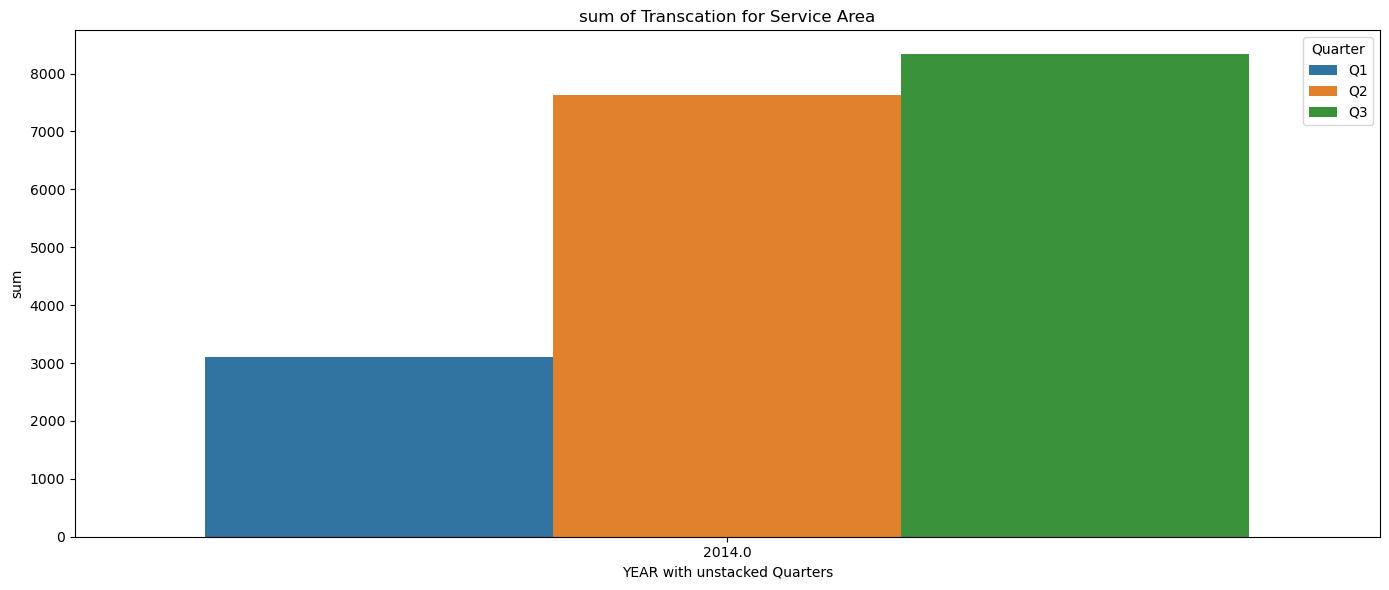

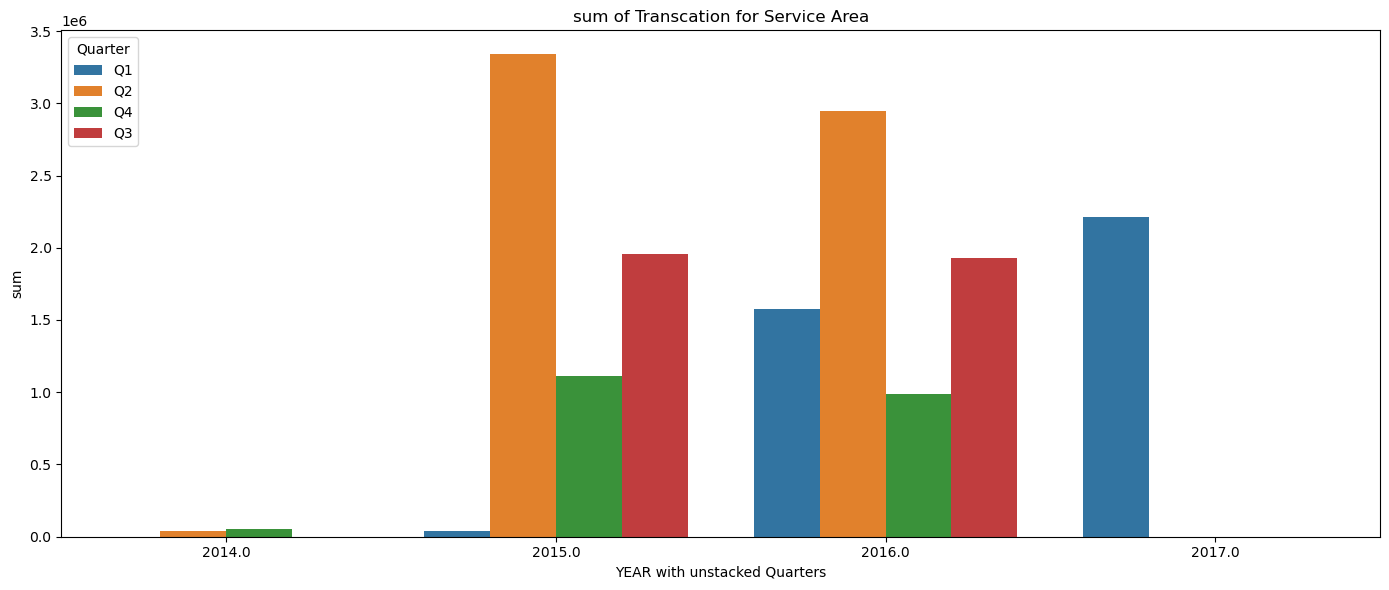

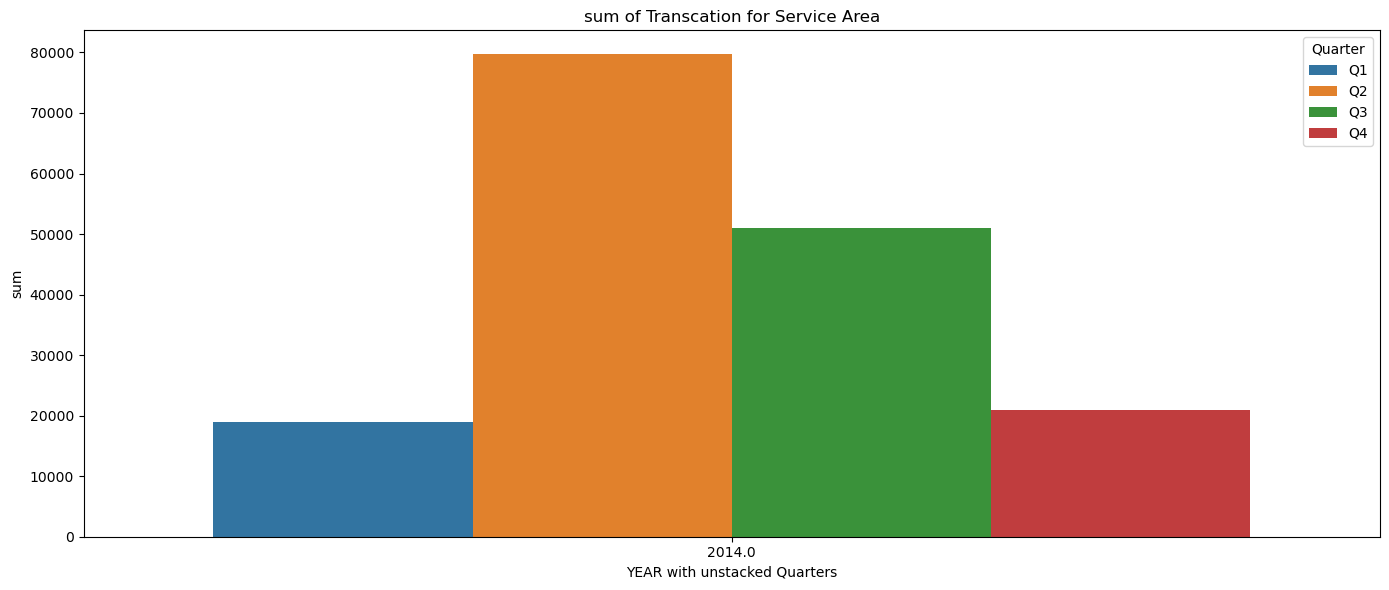

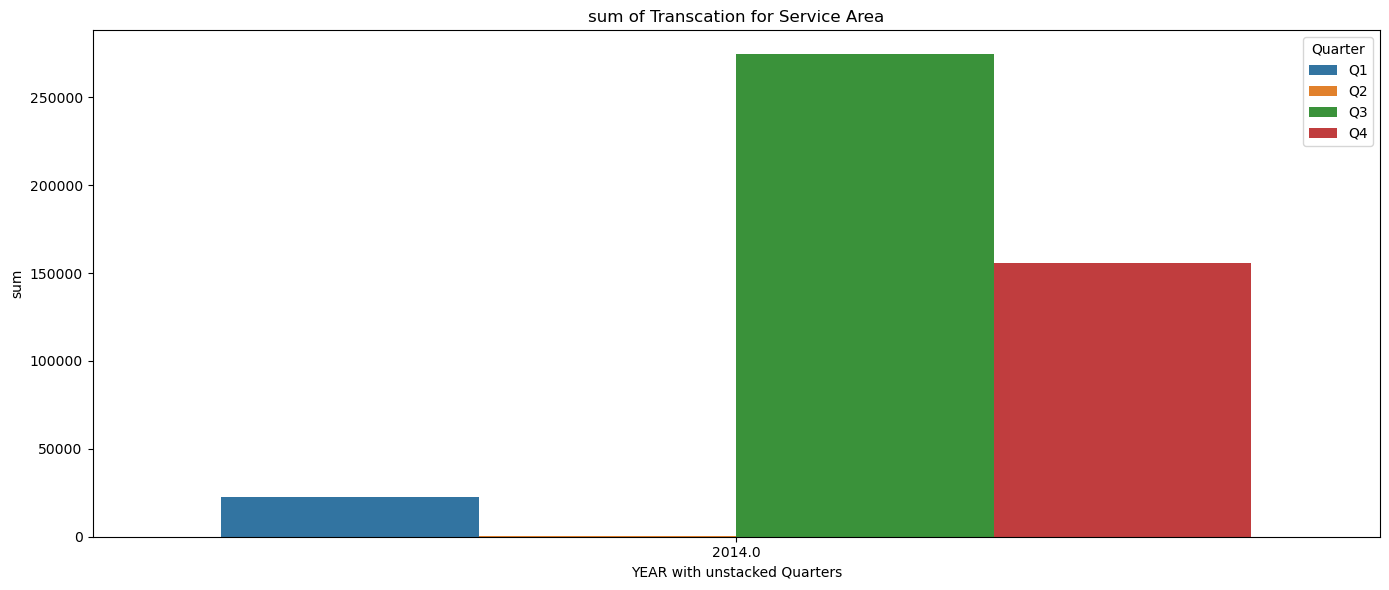

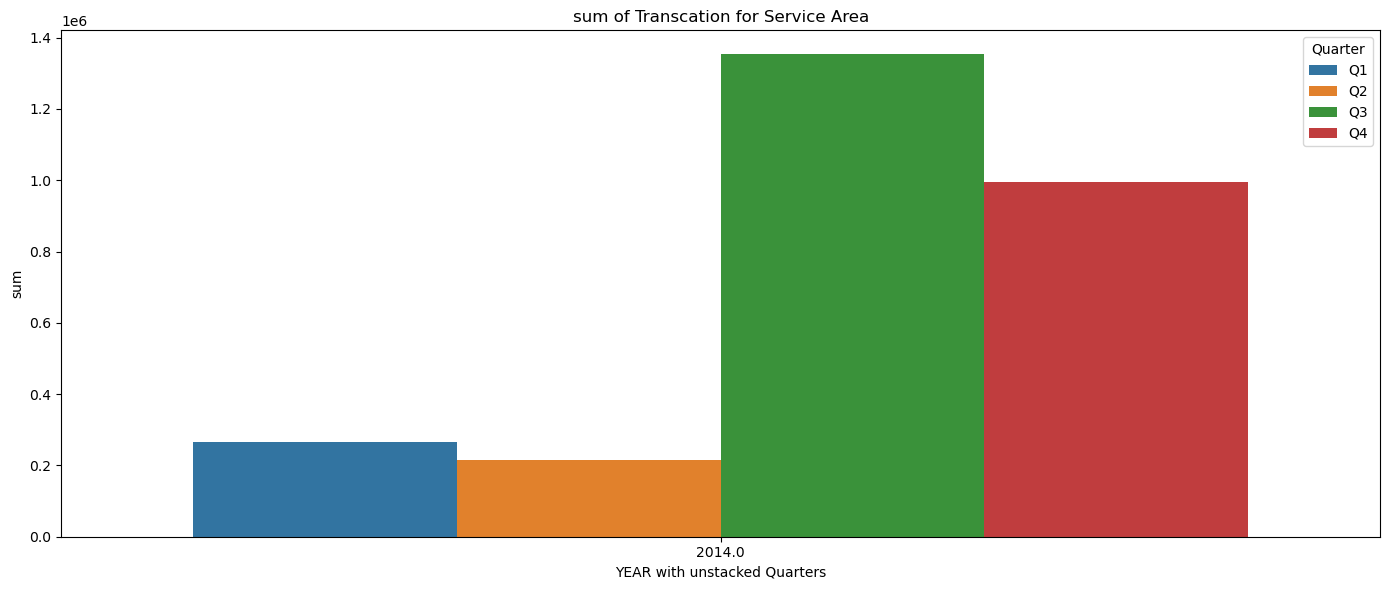

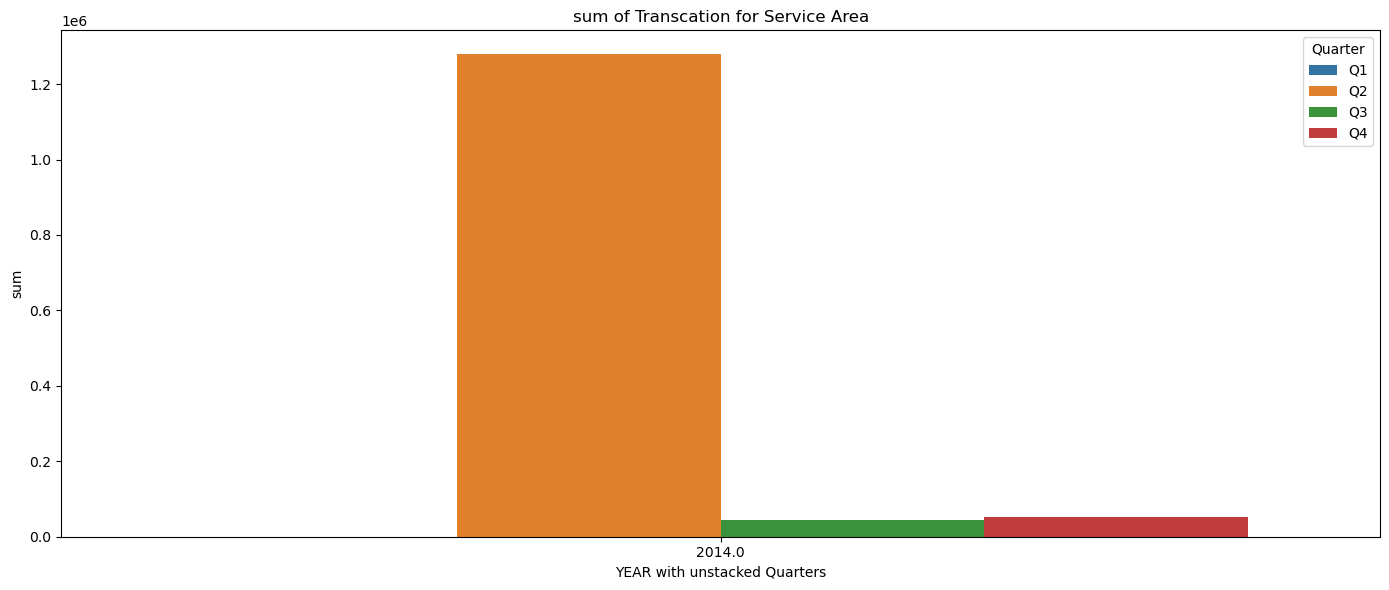

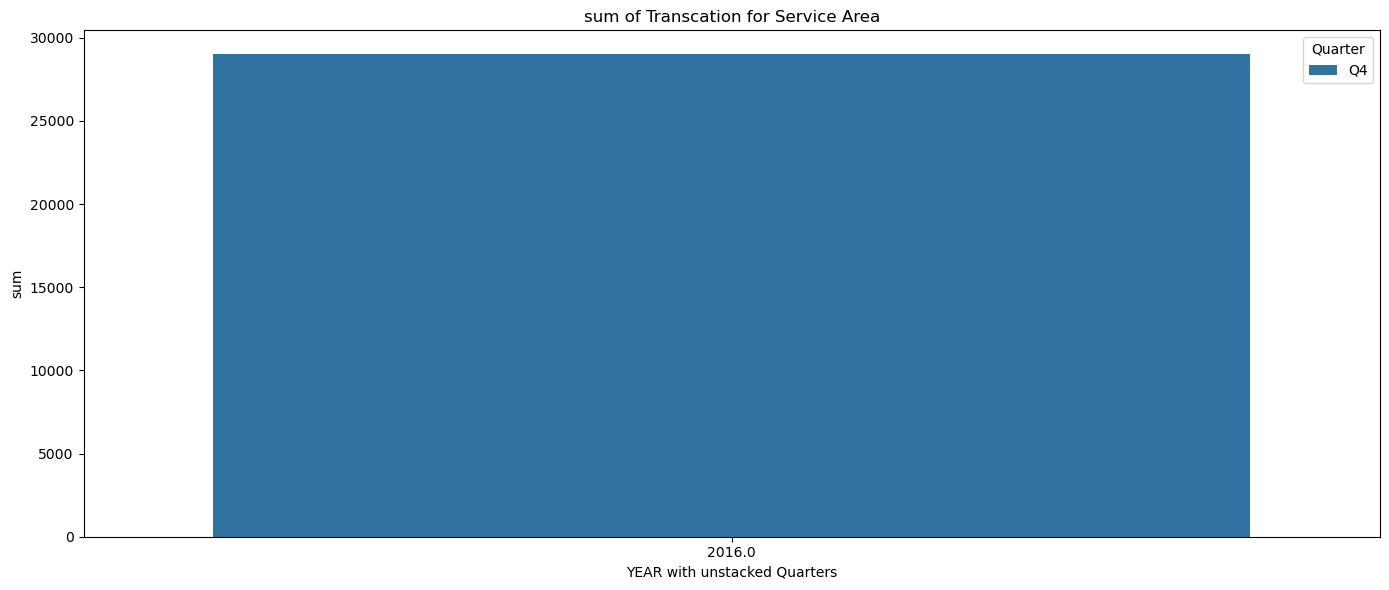

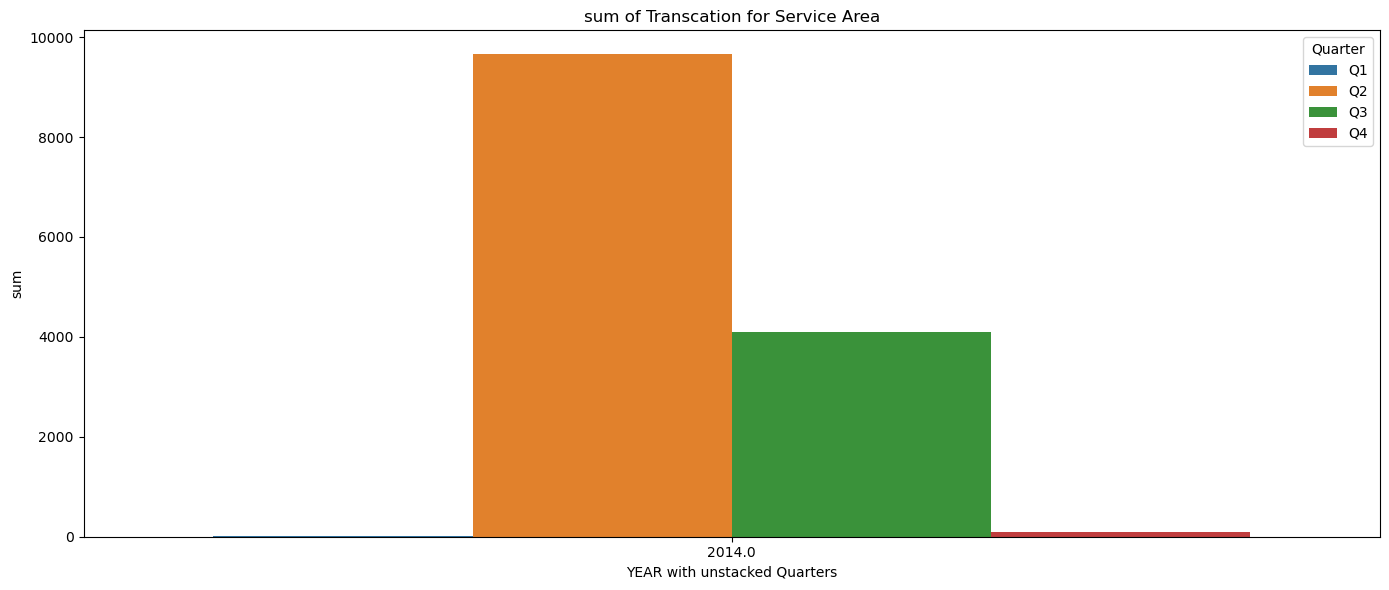

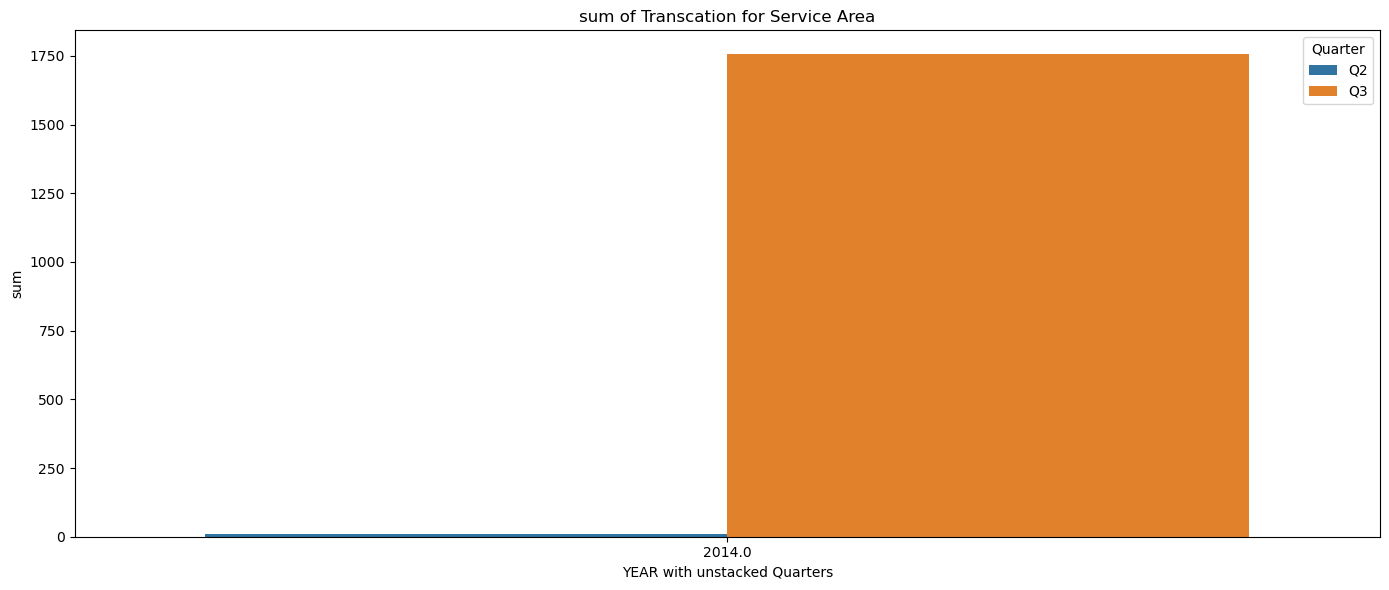

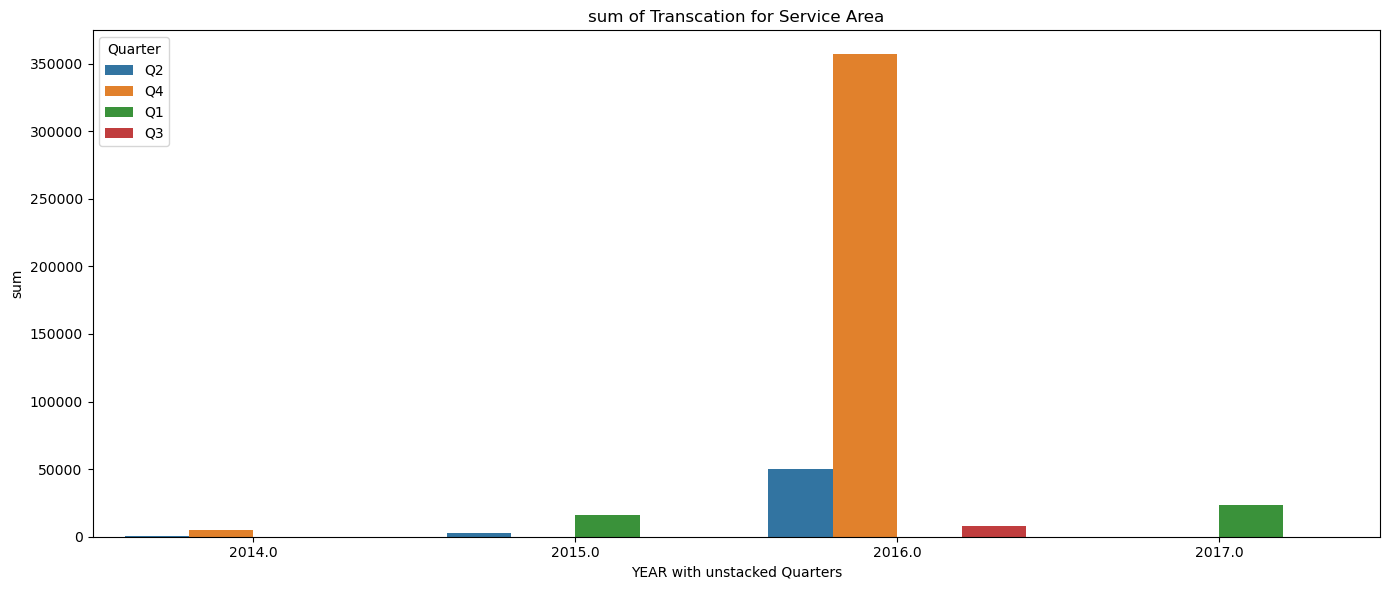

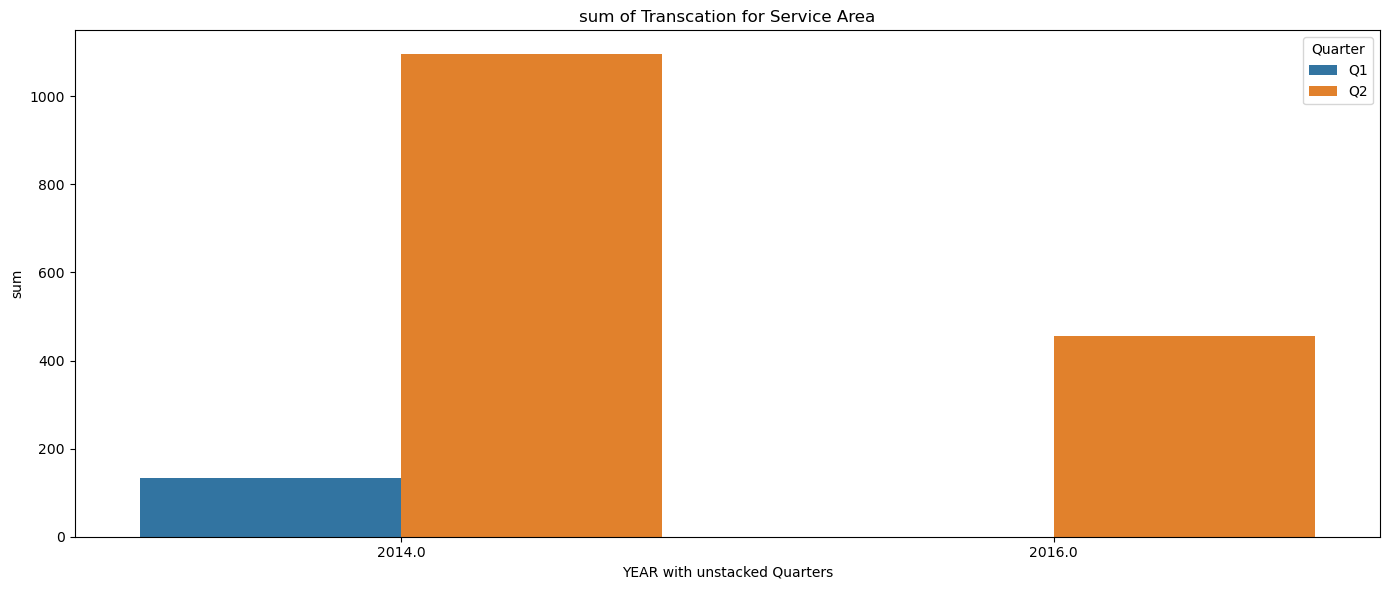

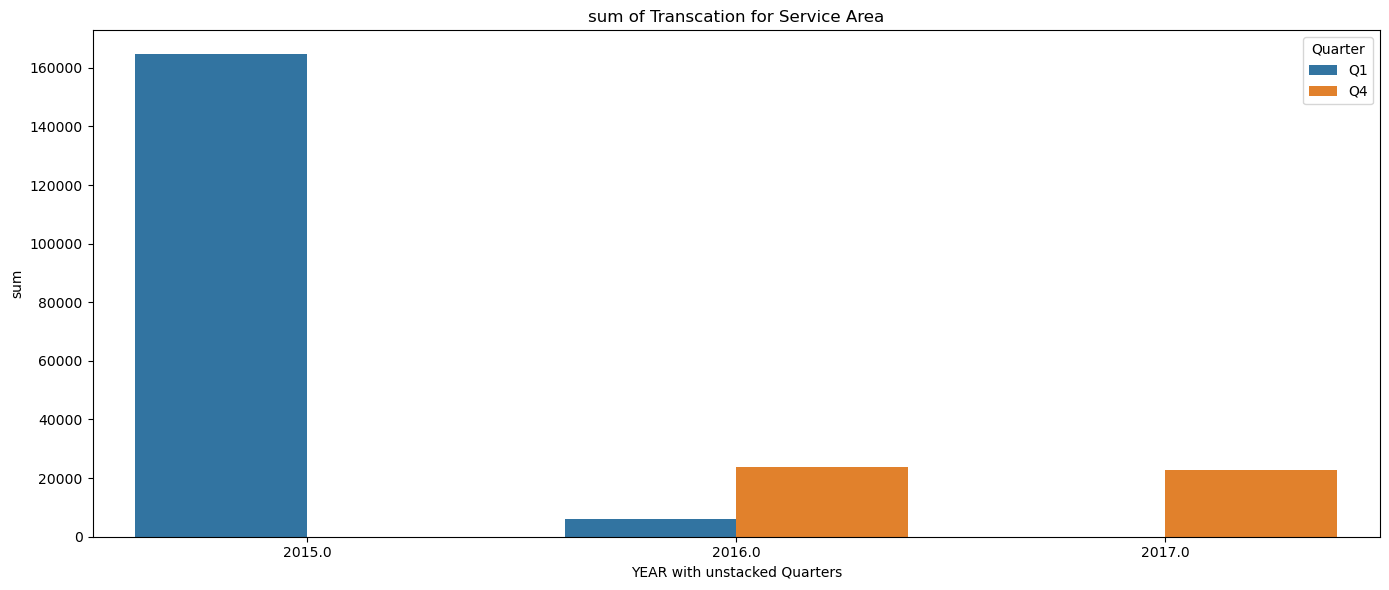

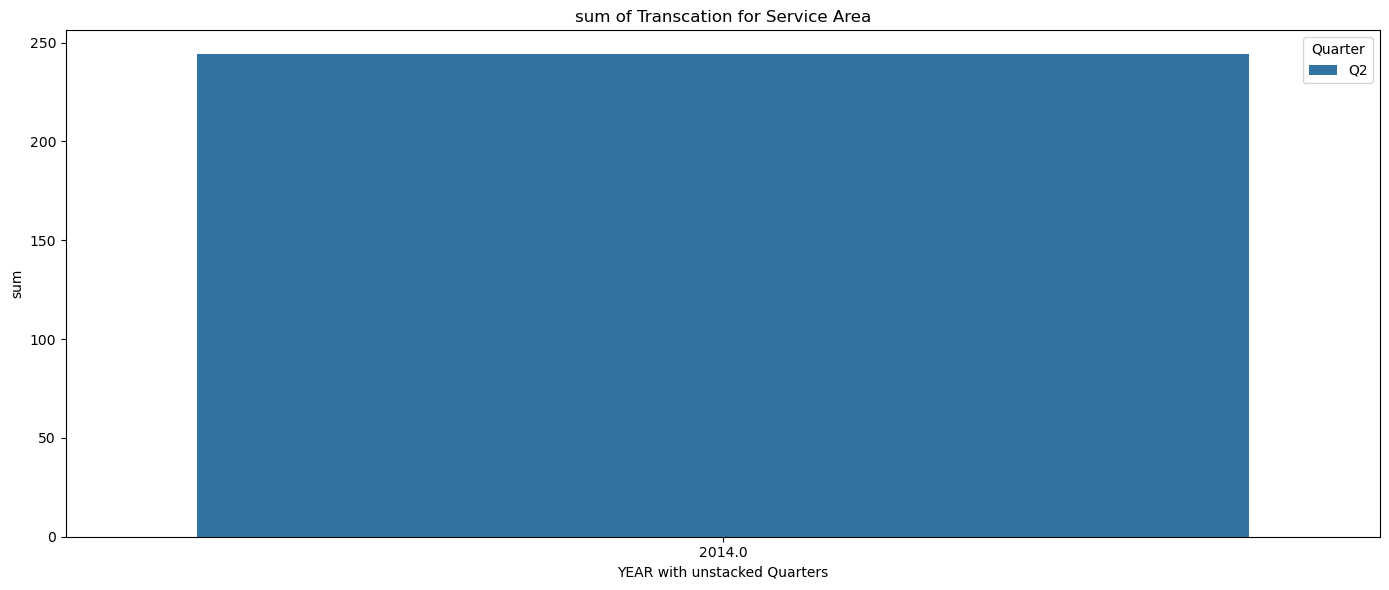

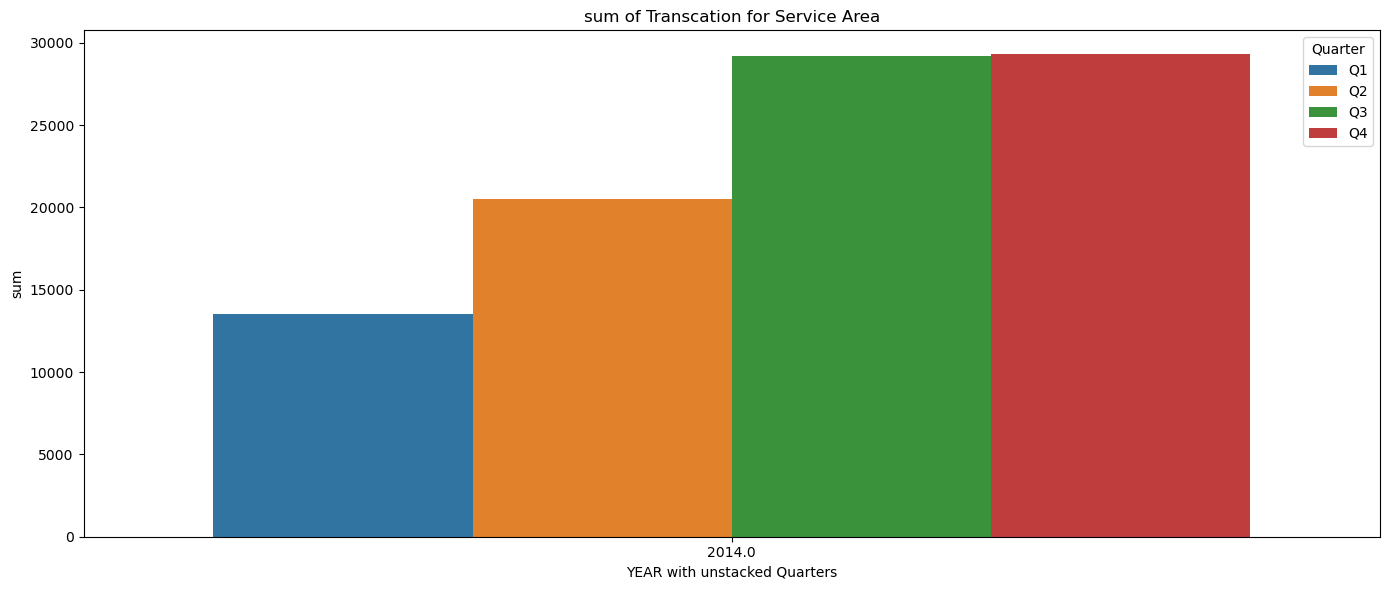

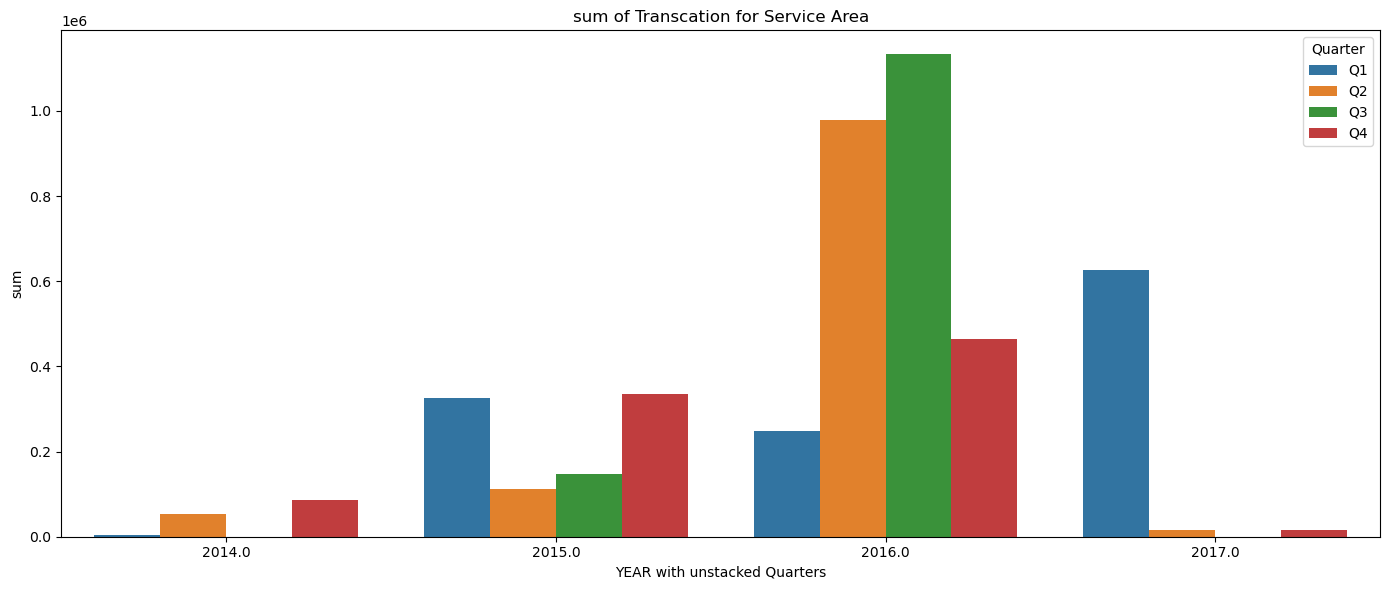

In [130]:
plot_q1(sa_year_qrt,'Service Area','sum') #passing service area column for stats

## Question 1 final summary


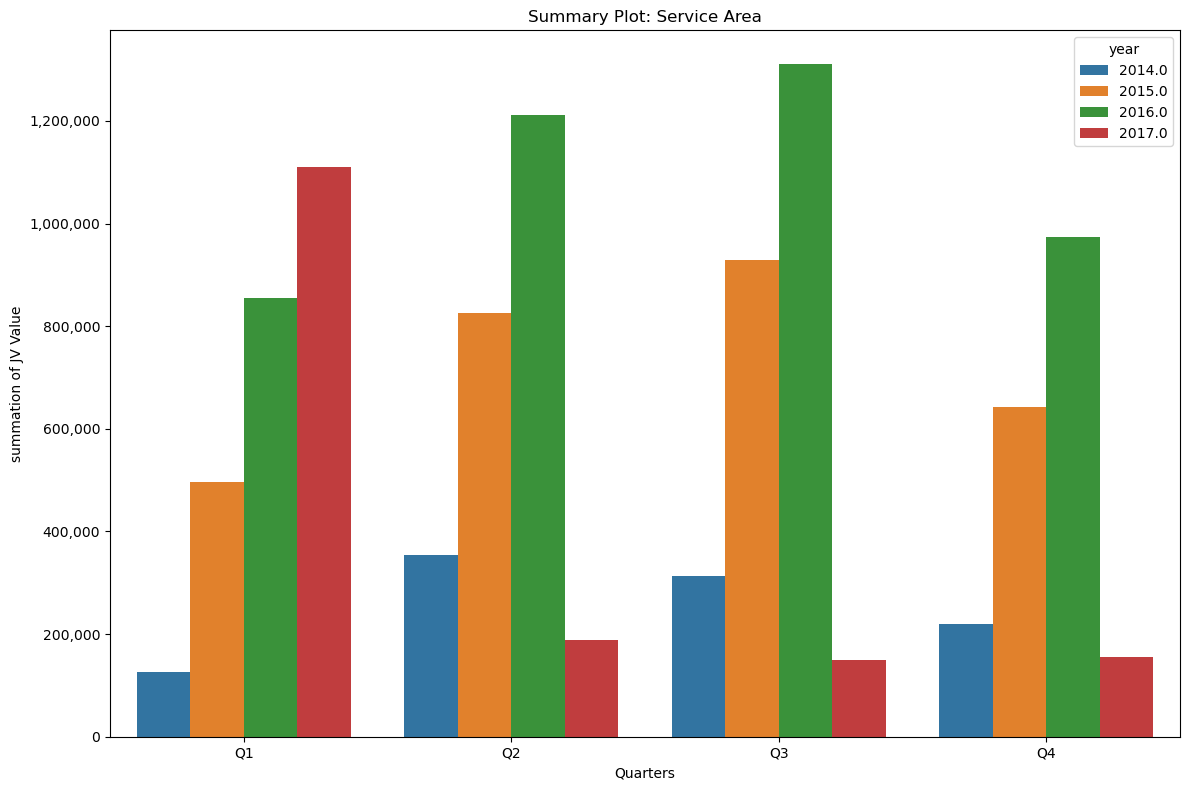

In [132]:
plot_q1a(df,'Service Area','JV Value')

+++++++++++++++++++++++++++++++++++++++++++++++++

## Question 2 part 1
### creating plot and observing spike on various time sectors 

In [134]:
#created few more tables for easy plotting 

df_filtered = df.dropna(subset=['QT_validation'])
df_filtered['Quarter'] = df_filtered['Transaction Date'].dt.to_period('Q').astype(str) #the formart was creating issue so converted 
## custom list of year-quarter
quarter_order = ['2014Q1', '2014Q2', '2014Q3', '2014Q4','2015Q1', '2015Q2', '2015Q3', '2015Q4','2016Q1', '2016Q2', '2016Q3', '2016Q4','2017Q1', '2017Q2', '2017Q3', '2017Q4']
df_filtered['Quarter'] = pd.Categorical(df_filtered['Quarter'], categories=quarter_order, ordered=True) #to control the order issue araised

In [135]:
#plotting the transaction amount 

def spike_plot(data,x,y,col_temp=None):
    """
    arg:data--> dataframe 
    arg:xaxis value
    arg:yaxis value
    col_temp: col parameter for relplot
    """
    if col_temp:
        g = sns.relplot(data=data, x=x, y=y, kind='line', col=col_temp,
                col_wrap=2, aspect=2, height=3, linewidth=2)
        g.set_titles('{col_name}')
        g.set_axis_labels('Quarter', 'Transaction Amount')

        # Adjust x-ticks for all subplots
        for ax in g.axes.flatten():
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        plt.tight_layout()
        plt.show()
    else:
        sns.relplot(data=data, x=x, y=y, kind='line',height=6, linewidth=2,aspect=3,ci=None)
        plt.title('Transaction Amount')
        plt.xlabel('Quarter-Year')
        plt.ylabel('Transaction Amount')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    
 

## Question 2 part 1
### Service Area

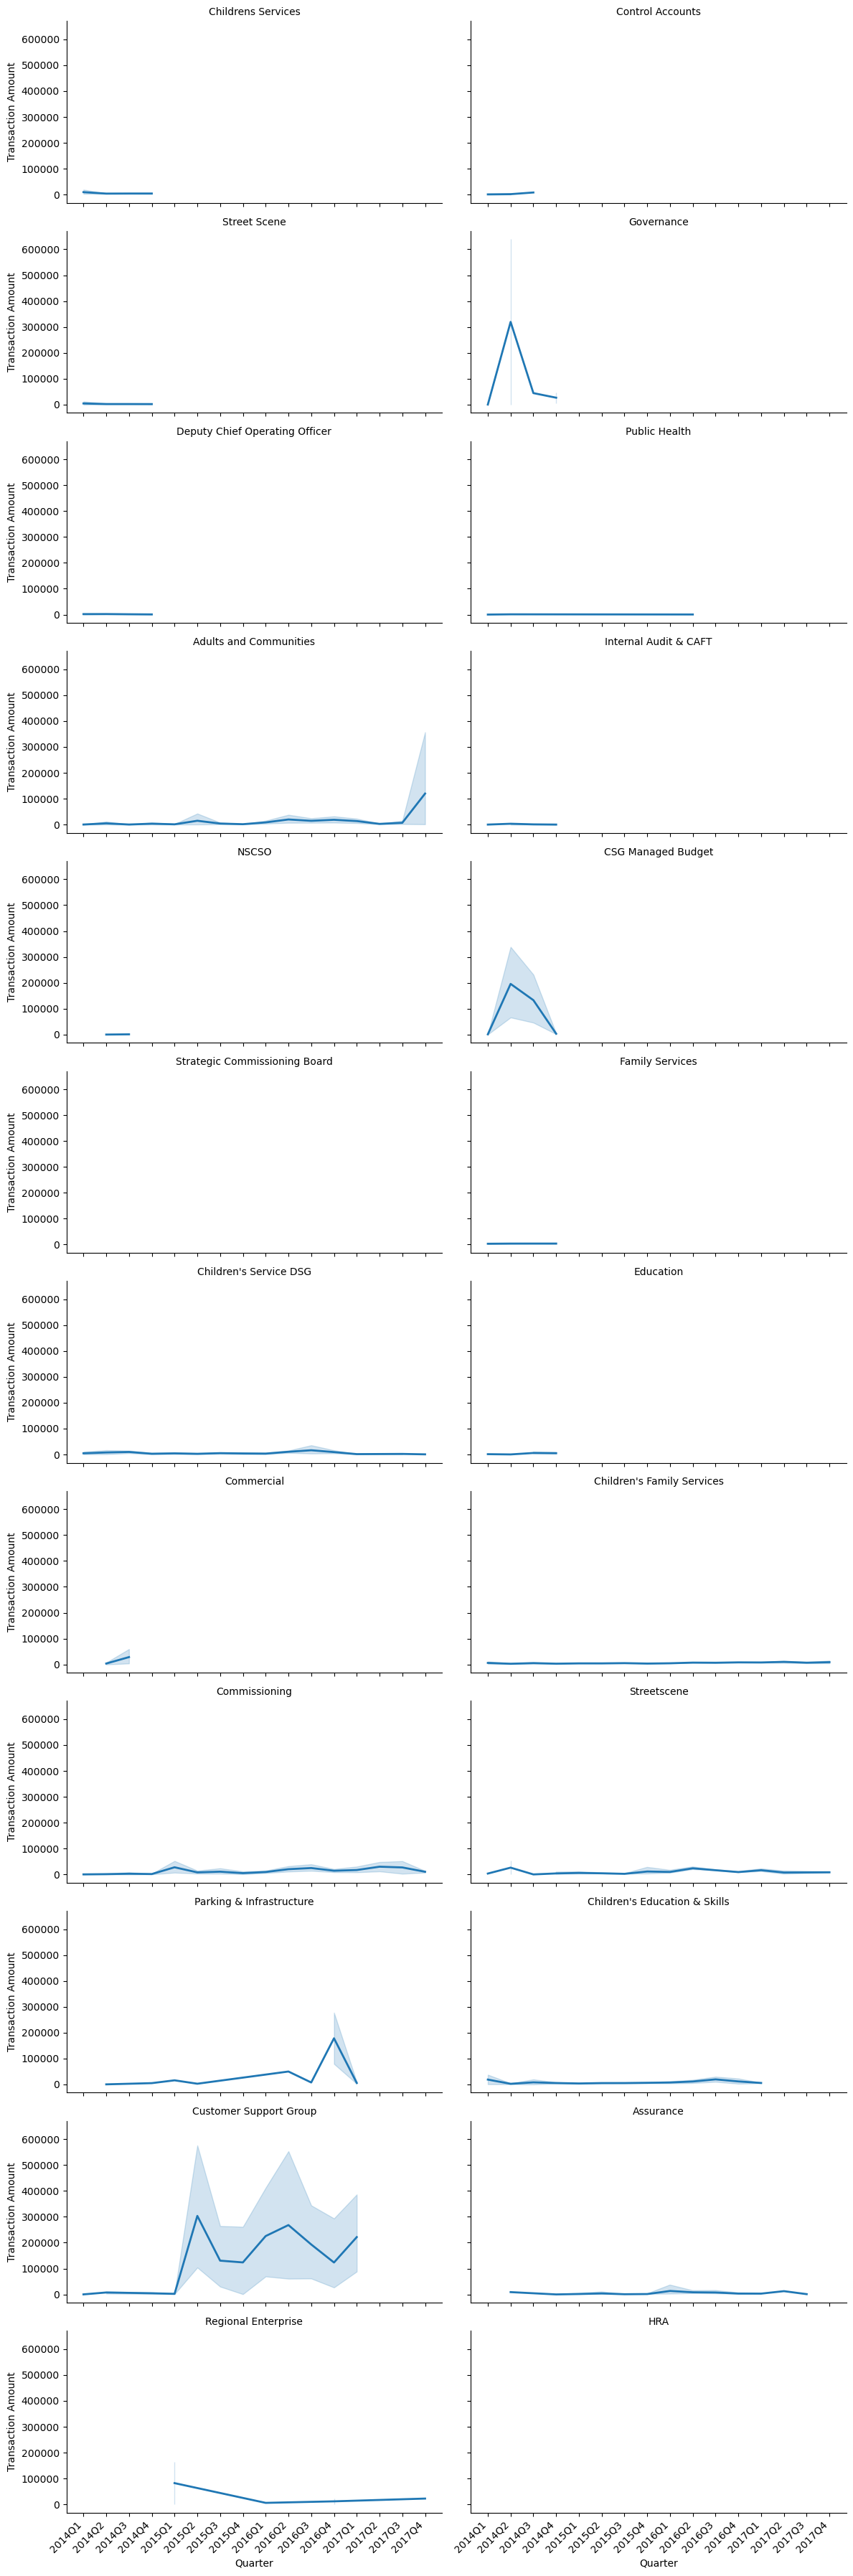

In [137]:
spike_plot(df_filtered,'Quarter','JV Value',col_temp='Service Area')

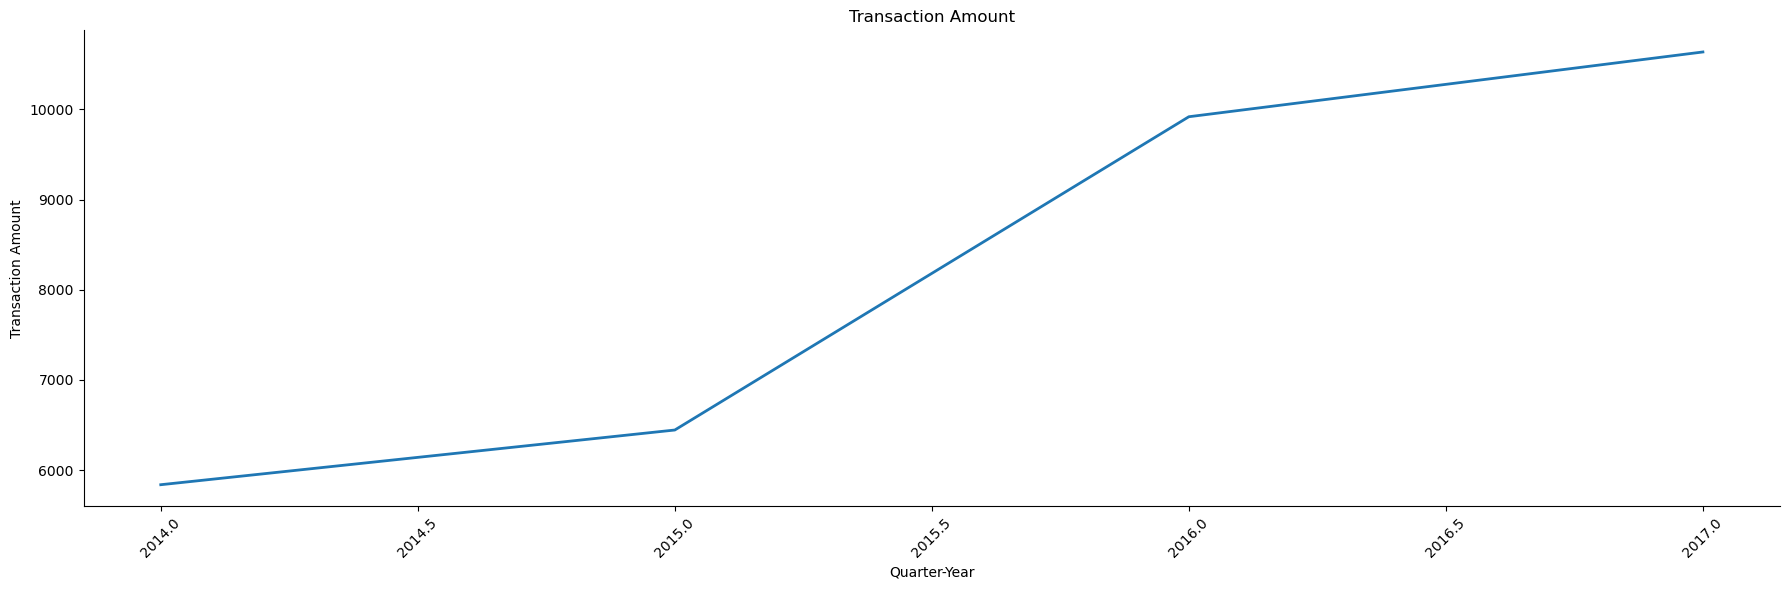

In [138]:
spike_plot(df_filtered,'year','JV Value')

In [141]:
#observation through z-score and percentage differnce in the transaction amount

In [142]:
sp_const=5
per_const=2

In [143]:
df['zscore'] = df.groupby(['Service Area', 'Account Description', 'QT_validation'])['JV Value'].transform(lambda x: (x - x.mean()) / x.std())
#artbitary value of 5 as treshold
z_score_spike=df[df['zscore']>sp_const]
z_score_non_spike=df[df['zscore']<per_const]

#using percentage differnce bwt consecutive values
#first date is ordered in ascending
df_sorted = df.groupby(['Service Area', 'Account Description']).apply(lambda x: x.sort_values('Transaction Date')).reset_index(drop=True)
df_sorted['%change'] = df_sorted.groupby(['Service Area', 'Account Description'])['JV Value'].pct_change()


percent_spike=df_sorted[df_sorted['%change']>sp_const]
percent_non_spike=df_sorted[df_sorted['%change']<per_const]


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Question 4 
### similarity I

In [148]:
#creating pipeline for clustering the service area by transaction count and total

In [149]:
def similarity(data,col,val,k):
    """
    arg:data--> dataframe 
    arg:col--> column which has to be clustered 
    arg:val--> to be clustered of
    arg:k--> cluster number for kmeans
    function: to create a clustering model
    returns dataframe with culster number 
    """
    temp=data.groupby(col)[val].agg(['count', 'sum', 'mean', 'median', 'std']).reset_index()
    temp=temp.dropna()
#     temp = temp.replace([np.inf, -np.inf], np.nan).dropna()
    std= StandardScaler()
    scaled=std.fit_transform(temp.drop(col, axis=1))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled)
    temp['cluster_id']=kmeans.labels_
    
    plt.figure(figsize=(14,7))
    sns.scatterplot(data=temp,x='sum',y='mean',hue='cluster_id',palette='viridis',s=100)
    plt.legend()
    plt.title("similarity plot")
    plt.grid(True)
    plt.show()
    
    
#     plt.figure(figsize=(10, 6))
# sns.scatterplot(x='sum', y='sum', hue='cluster_id', data=a, palette='viridis', s=100)
# plt.title('Service Areas Grouped by Spending Behavior')
# plt.xlabel('Average Transaction Amount')
# plt.ylabel('Total Transaction Amount')
# plt.legend(title='Cluster')
# plt.grid(True)
# plt.show()
    return temp,scaled
    
    

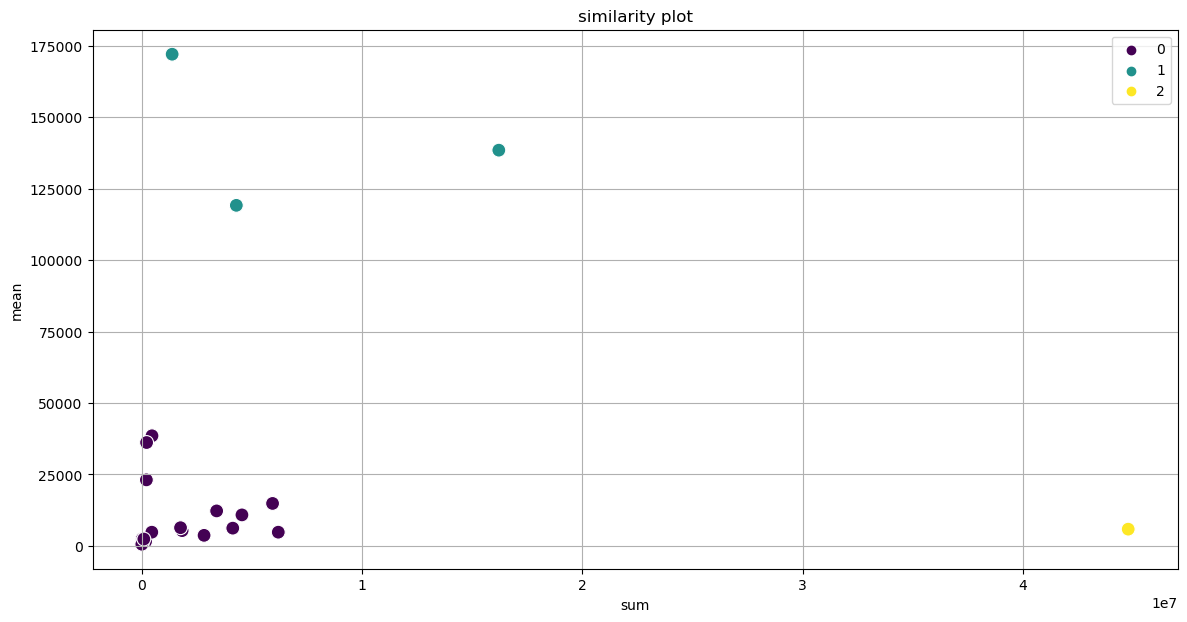

In [151]:
clus_analysis,scaled=similarity(df,'Service Area','JV Value',3)

In [152]:
clus_analysis

,Service Area,count,sum,mean,median,std,cluster_id
0,Adults and Communities,278,3396782.0,12218.640288,1831.0,36217.416042,0
1,Assurance,344,1829415.0,5318.066860,900.0,27137.891992,0
2,CSG Managed Budget,36,4290803.0,119188.972222,4564.0,213468.294515,1
3,Children's Education & Skills,667,4128956.0,6190.338831,1385.0,12512.615280,0
4,Children's Family Services,7672,44773136.0,5835.914494,1797.5,12028.966756,2
5,Children's Service DSG,277,1757715.0,6345.541516,1894.0,13725.713997,0
6,Childrens Services,1297,6194487.0,4776.011565,675.0,20421.416626,0
7,Commercial,9,207786.0,23087.333333,594.0,37508.583144,0
8,Commissioning,400,5934935.0,14837.337500,4612.0,37451.003617,0
9,Control Accounts,8,19071.0,2383.875000,813.5,3146.298616,0


In [153]:
clus_analysis[clus_analysis['cluster_id']==0]

,Service Area,count,sum,mean,median,std,cluster_id
0,Adults and Communities,278,3396782.0,12218.640288,1831.0,36217.416042,0
1,Assurance,344,1829415.0,5318.066860,900.0,27137.891992,0
3,Children's Education & Skills,667,4128956.0,6190.338831,1385.0,12512.615280,0
5,Children's Service DSG,277,1757715.0,6345.541516,1894.0,13725.713997,0
6,Childrens Services,1297,6194487.0,4776.011565,675.0,20421.416626,0
7,Commercial,9,207786.0,23087.333333,594.0,37508.583144,0
8,Commissioning,400,5934935.0,14837.337500,4612.0,37451.003617,0
9,Control Accounts,8,19071.0,2383.875000,813.5,3146.298616,0
11,Deputy Chief Operating Officer,113,170580.0,1509.557522,121.0,2830.648966,0
12,Education,95,453424.0,4772.884211,500.0,9874.088276,0


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Question 3

In [155]:
def repeating_values(data,check_col,on_col,repeat):
    """
    arg:data-->dataframe
    arg:check_col-->column to be looked for misclassifications
    arg:on_col-->against which column
    arg:repeat--> repetation allowed
    function: calculating the frequency of the column values
    return: dataframe
    """
    grp=data.groupby([check_col,on_col]).size().reset_index(name="count")
    frq=grp.groupby(check_col)[on_col].count()
    repeating_cond = frq[frq > 1]
    top_inst=repeating_cond.sort_values(ascending=False)[:25]
        
    plt.figure(figsize=(14,7))
    plt.bar(top_inst.index,top_inst.values)
    plt.xlabel('creditor name')
    plt.ylabel('number of accounts present in')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    return top_inst,repeating_cond


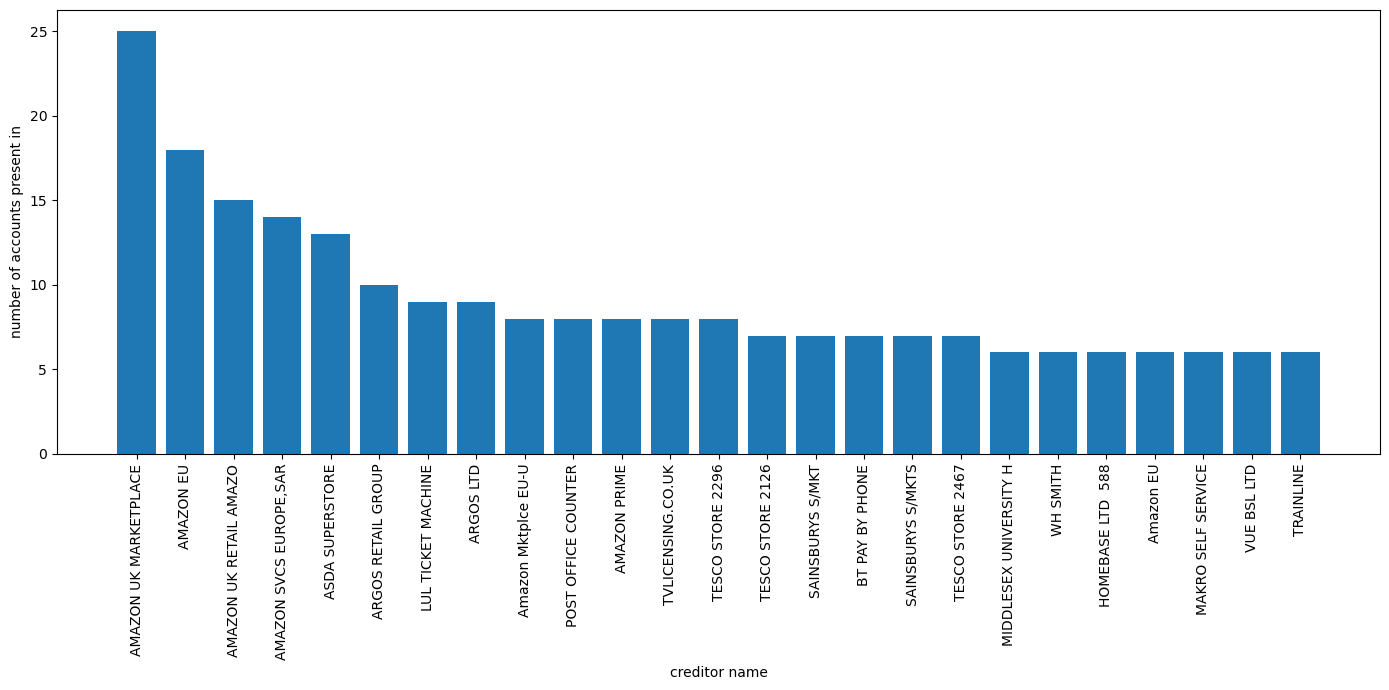

In [156]:
top_list,whole_list=repeating_values(df,'Creditor','Account Description',2)

In [157]:
top_list.head() 

Creditor
AMAZON UK MARKETPLACE     25
AMAZON EU                 18
AMAZON UK RETAIL AMAZO    15
AMAZON SVCS EUROPE,SAR    14
ASDA SUPERSTORE           13
Name: Account Description, dtype: int64

+++++++++++++++++++++++++++++++++++++++++++++++++++++++